In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10
squidpy==1.2.3


In [2]:
ad_sp = sc.read_h5ad("/mnt/disk1/xzhou/data/multi-omics/MERFISH/merfish-updated.h5ad")
ad_sp

AnnData object with n_obs × n_vars = 280327 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id'
    var: 'n_iso'
    layers: 'X', 'log1p', 'norm'

In [3]:
for ii in ad_sp.obs['slice_id'].unique():
    print(ii, sum(ad_sp.obs['slice_id']==ii))

mouse2_slice31 2037
mouse2_slice160 4542
mouse2_slice109 5215
mouse1_slice71 5749
mouse2_slice219 3580
mouse2_slice289 4375
mouse1_slice313 3920
mouse2_slice309 3296
mouse1_slice153 7656
mouse1_slice201 6271
mouse2_slice61 3316
mouse1_slice40 4159
mouse1_slice1 2378
mouse2_slice1 1706
mouse2_slice151 5065
mouse1_slice102 6731
mouse1_slice162 6963
mouse1_slice221 5763
mouse1_slice200 2197
mouse2_slice300 3800
mouse2_slice90 4946
mouse1_slice283 4308
mouse1_slice326 4145
mouse2_slice209 4434
mouse1_slice50 4417
mouse1_slice112 4996
mouse1_slice212 6535
mouse1_slice271 3899
mouse2_slice119 5042
mouse1_slice291 4453
mouse2_slice169 5213
mouse1_slice31 3106
mouse2_slice280 3874
mouse1_slice232 5375
mouse1_slice10 2423
mouse1_slice241 4052
mouse1_slice251 4429
mouse2_slice99 5240
mouse1_slice190 5730
mouse2_slice319 2800
mouse2_slice189 4433
mouse1_slice81 5262
mouse2_slice249 4118
mouse2_slice139 4208
mouse1_slice21 2033
mouse2_slice129 5157
mouse2_slice79 3870
mouse2_slice229 5083
mouse1_s

In [4]:
#slice information
ad_sp1 = ad_sp[ad_sp.obs['slice_id']=='mouse1_slice180']
ad_sp1.var

,n_iso
1700022I11Rik,5
1810046K07Rik,2
5031425F14Rik,1
5730522E02Rik,8
Acta2,1
...,...
Sst,1
Rab3b,4
Slc17a7,5
Penk,2


In [38]:
ad_sp1

AnnData object with n_obs × n_vars = 6264 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y', 'uniform_density', 'rna_count_based_density'
    var: 'n_iso', 'n_cells', 'sparsity'
    uns: 'subclass_colors', 'training_genes', 'overlap_genes'
    obsm: 'spatial', 'tangram_ct_pred'
    layers: 'X', 'log1p', 'norm'

In [6]:
#Add spatial information to rna data
ad_sp1.obsm['spatial'] = ad_sp1.obs[['center_x', 'center_y']].values
ad_sp1.X = ad_sp1.layers['X'].astype(int) ## MERFISH的counts不是整数，需要强制取整，否则后面报错
ad_sp1.obs[['x', 'y']] = ad_sp1.obs[['center_x', 'center_y']]

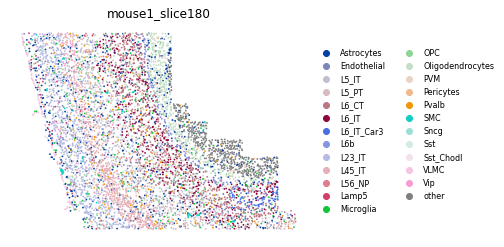

In [7]:
sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=['mouse1_slice180'], 
                      legend_fontsize=8,show=True, frameon=False, colorbar_loc=None, spot_size=20, 
                     legend_loc = 'right margin') ## size=1.5, legend_loc='on data',

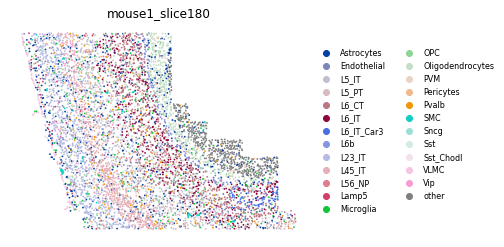

In [8]:
sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=['mouse1_slice180'], 
                      legend_fontsize=8,show=True, frameon=False, colorbar_loc=None, spot_size=20, 
                     legend_loc = 'right margin') ## size=1.5, legend_loc='on data',

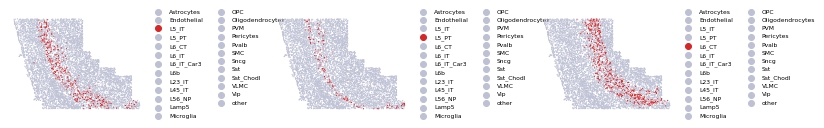

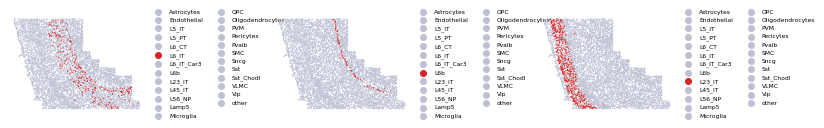

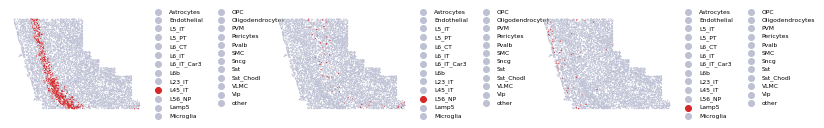

In [9]:
colors_use = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#bcbd22', '#17becf', '#aec7e8',
              '#ffbb78', '#98df8a', '#ff9896', '#bec1d4', '#bb7784',
              '#0000ff', '#FFFF00', '#800080', '#e07b91',
              '#959595', '#7d87b9', '#d6bcc0', 
              '#8e063b', '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9',
              '#d33f6a', '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d',
              '#ef9708', '#0fcfc0', '#9cded6', '#d5eae7', '#f3e1eb', '#f6c4e1',
              '#111010', '#f79cd4']

# ad_sp1.uns['subclass_colors'] = ['#bec1d4']*len(ad_sp1.obs['subclass'].unique())
# #[colors_use[i] for i in range(len(ad_sp1.obs['subclass'].unique()))]

# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (2.5, 2.5)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'wspace': 0.9, 'hspace': 0.2})

jj=0
for ii in [2,3,4]:
    ad_sp1.uns['subclass_colors'] = ['#bec1d4']*len(ad_sp1.obs['subclass'].unique())
    #[colors_use[i] for i in range(len(ad_sp1.obs['subclass'].unique()))]    
    ad_sp1.uns['subclass_colors'][ii] = '#d62728'
    sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=[''], 
                          legend_fontsize=6,show=False, frameon=False, colorbar_loc=None, spot_size=30, 
                         legend_loc = 'right margin',ax=ax[jj]) ## size=1.5, legend_loc='on data',
    jj= jj+1
plt.show()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'wspace': 0.9, 'hspace': 0.2})
jj=0
for ii in [5,7,8]:
    ad_sp1.uns['subclass_colors'] = ['#bec1d4']*len(ad_sp1.obs['subclass'].unique())
    #[colors_use[i] for i in range(len(ad_sp1.obs['subclass'].unique()))]    
    ad_sp1.uns['subclass_colors'][ii] = '#d62728'
    sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=[''], 
                          legend_fontsize=6,show=False, frameon=False, colorbar_loc=None, spot_size=30, 
                         legend_loc = 'right margin',ax=ax[jj]) ## size=1.5, legend_loc='on data',
    jj= jj+1
plt.show()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'wspace': 0.9, 'hspace': 0.2})
jj=0
for ii in [9,10,11]:
    ad_sp1.uns['subclass_colors'] = ['#bec1d4']*len(ad_sp1.obs['subclass'].unique())
    #[colors_use[i] for i in range(len(ad_sp1.obs['subclass'].unique()))]    
    ad_sp1.uns['subclass_colors'][ii] = '#d62728'
    sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=[''], 
                          legend_fontsize=6,show=False, frameon=False, colorbar_loc=None, spot_size=30, 
                         legend_loc = 'right margin',ax=ax[jj]) ## size=1.5, legend_loc='on data',
    jj= jj+1
plt.show()

In [10]:
ad_sp1

AnnData object with n_obs × n_vars = 6264 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y'
    var: 'n_iso'
    uns: 'subclass_colors'
    obsm: 'spatial'
    layers: 'X', 'log1p', 'norm'

In [11]:
ad_sc = sc.read_h5ad("/mnt/disk1/xiaojk/data/mousebrain/mousebrain_genescore_matrix(21808.8055).h5ad")

In [12]:
np.unique(ad_sc.X.toarray()[0, :])

array([0.        , 0.38896308, 0.66829089, 0.88638817, 1.06533135,
       1.21706189, 1.34877433])

In [13]:
ad_sc1 = sc.read_h5ad("/mnt/disk1/xzhou/code/pycharm_project/GLUE-master/data/download/Chen-2019/Chen-2019-ATAC.h5ad")

In [14]:
ad_sc1

AnnData object with n_obs × n_vars = 9190 × 241757
    obs: 'domain', 'cell_type'

In [15]:
ad_sc1.obs_names = [name.replace("_ATAC", "") for name in ad_sc1.obs_names]
ad_sc1.obs

,domain,cell_type
09L_GTAAACCCGATA,scATAC-seq,E2Rasgrf2
09D_GCCGGGCGGCCG,scATAC-seq,E4Thsd7a
09J_TAGGCCTGAATT,scATAC-seq,E2Rasgrf2
09C_TCCGGCATCTCA,scATAC-seq,E6Tle4
09C_AGGCCACGTACA,scATAC-seq,E2Rasgrf2
...,...,...
09H_GTTTACCTAGTT,scATAC-seq,InP
09F_TAGTTGGCAGAT,scATAC-seq,E3Rorb
09L_CTTAGACGTCTA,scATAC-seq,E6Tle4
09C_GATGTAATTTGA,scATAC-seq,InV


In [16]:
import pandas as pd
import anndata as ad

# 假设 ad_sc1 和 ad_sc 是两个 Anndata 结构
# 获取 ad_sc1 和 ad_sc 的 obs_names
obs_names_ad_sc1 = ad_sc1.obs_names
obs_names_ad_sc = ad_sc.obs_names

# 找到匹配的观测值
matching_obs = set(obs_names_ad_sc1).intersection(obs_names_ad_sc)

# 输出匹配到的数据总数量
print("匹配到的数据总数量：", len(matching_obs))

# 找到未匹配到的观测行的索引
rows_to_drop = [i for i, obs_name in enumerate(ad_sc.obs_names) if obs_name not in matching_obs]

# 删除未匹配到的观测行，并更新维度
ad_sc = ad_sc[ad_sc.obs_names.isin(matching_obs)].copy()

# 遍历匹配的观测值，将 cell_type 赋值给 ad_sc
for obs_name in matching_obs:
    cell_type = ad_sc1.obs.loc[obs_name, 'cell_type']
    ad_sc.obs.loc[obs_name, 'celltype'] = cell_type

# 确保更新后的 celltype 列已经被赋值到 ad_sc
print(ad_sc.obs['celltype'])


匹配到的数据总数量： 7339
09A_CAGCCCCGCCTT        E3Rorb
09A_CGCCTACCATGA       E5Parm1
09A_GATGCGCGGCTA           Ast
09A_GGTCCGAGTCCT    E4Il1rapl2
09A_TCTCCCGGCACC       E5Parm1
                       ...    
09L_ACTATTATGATT        E6Tle4
09L_GTGCGGAGGGCG          Clau
09L_CCTGCCGAGACG          Clau
09L_GCCCAGCAGCCA     E2Rasgrf2
09L_AGCGCTATCCCC           InP
Name: celltype, Length: 7339, dtype: object


In [17]:
ad_sc

AnnData object with n_obs × n_vars = 7339 × 21808
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype'
    var: 'features'

In [18]:
len(list(ad_sc1.obs['cell_type'].unique()))

22

In [19]:
len(list(ad_sc.obs['celltype'].unique()))

22

In [20]:
np.unique(ad_sc.X.toarray()[0, :])

array([0.        , 0.38896308, 0.66829089, 0.88638817, 1.06533135,
       1.21706189, 1.34877433])

In [21]:
ad_sc.obs.celltype.value_counts()

celltype
E2Rasgrf2     1938
E3Rorb        1164
E6Tle4         975
E4Il1rapl2     567
E5Galnt14      466
E4Thsd7a       439
E5Parm1        329
E3Rmst         226
InP            215
InS            170
Ast            164
E5Sulf1        151
Clau           114
OliM           106
InV             88
E5Tshz2         68
InN             65
Mic             35
OPC             18
Peri            14
Endo            14
OliI            13
Name: count, dtype: int64

In [22]:
# sc.pp.normalize_total(ad_sc)

In [23]:
ad_sc.obs['subclass_label'] = ad_sc.obs.celltype

In [24]:
ad_sc.X.max()

3.6228440351377653

In [25]:
ad_sc.obs.subclass_label.value_counts()

subclass_label
E2Rasgrf2     1938
E3Rorb        1164
E6Tle4         975
E4Il1rapl2     567
E5Galnt14      466
E4Thsd7a       439
E5Parm1        329
E3Rmst         226
InP            215
InS            170
Ast            164
E5Sulf1        151
Clau           114
OliM           106
InV             88
E5Tshz2         68
InN             65
Mic             35
OPC             18
Peri            14
Endo            14
OliI            13
Name: count, dtype: int64

In [26]:
sc.tl.rank_genes_groups(ad_sc, groupby="celltype", use_raw=False)
markers_df = pd.DataFrame(ad_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

1636

In [27]:
ad_sp1.obs

,fovID,fov_x,fov_y,volume,center_x,center_y,slice_id,sample_id,label,subclass,class_label,cell_id,x,y
112,304,4441.37,-5311.0,1610.125042,4504.074901,-5139.325004,mouse1_slice180,dataset1_sample4,L6_CT_1,L6_CT,Glutamatergic,112,4504.074901,-5139.325004
129,308,4641.37,-5111.0,240.272125,4734.104400,-5094.105000,mouse1_slice180,dataset1_sample4,Oligo_1,Oligodendrocytes,Other,129,4734.104400,-5094.105000
139,292,4241.37,-3911.0,1022.756589,4412.747898,-3793.716003,mouse1_slice180,dataset1_sample4,L45_IT_SSp_2,L45_IT,Glutamatergic,139,4412.747898,-3793.716003
156,359,6241.37,-3511.0,1225.880689,6381.682899,-3303.409505,mouse1_slice180,dataset1_sample4,Pvalb_1,Pvalb,GABAergic,156,6381.682899,-3303.409505
209,333,5041.37,-3711.0,975.904580,5160.591399,-3519.105505,mouse1_slice180,dataset1_sample4,L5_IT_4,L5_IT,Glutamatergic,209,5160.591399,-3519.105505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280117,271,3841.37,-3911.0,458.633073,4044.684897,-3878.790501,mouse1_slice180,dataset1_sample4,L23_IT_3,L23_IT,Glutamatergic,280117,4044.684897,-3878.790501
280119,295,4441.37,-3511.0,105.631946,4478.187401,-3392.408003,mouse1_slice180,dataset1_sample4,Astro_1,Astrocytes,Other,280119,4478.187401,-3392.408003
280138,262,3641.37,-5511.0,555.972497,3841.578398,-5446.363002,mouse1_slice180,dataset1_sample4,L45_IT_1,L45_IT,Glutamatergic,280138,3841.578398,-5446.363002
280160,346,5641.37,-3511.0,1719.962149,5753.942400,-3421.020502,mouse1_slice180,dataset1_sample4,L5_IT_4,L5_IT,Glutamatergic,280160,5753.942400,-3421.020502


In [28]:
tg.pp_adatas(ad_sc, ad_sp1, genes=markers)

INFO:root:90 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:231 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [29]:
assert ad_sc.uns['training_genes'] == ad_sp1.uns['training_genes']

In [30]:
ad_map = tg.map_cells_to_space(
    adata_sc=ad_sc,
    adata_sp=ad_sp1,
    #device='cpu',
    device='cuda:0',
)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 90 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.317, KL reg: 0.095
Score: 0.904, KL reg: 0.006
Score: 0.914, KL reg: 0.005
Score: 0.916, KL reg: 0.005
Score: 0.917, KL reg: 0.005
Score: 0.918, KL reg: 0.005
Score: 0.918, KL reg: 0.005
Score: 0.918, KL reg: 0.005
Score: 0.918, KL reg: 0.005
Score: 0.919, KL reg: 0.005


INFO:root:Saving results..


In [31]:
ad_sc

AnnData object with n_obs × n_vars = 7339 × 20266
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'subclass_label'
    var: 'features', 'n_cells', 'sparsity'
    uns: 'rank_genes_groups', 'training_genes', 'overlap_genes'

In [32]:
ad_sp1.var

,n_iso,n_cells,sparsity
1700022i11rik,5,41,0.993455
1810046k07rik,2,230,0.963282
5031425f14rik,1,51,0.991858
5730522e02rik,8,96,0.984674
acta2,1,2138,0.658685
...,...,...,...
sst,1,209,0.966635
rab3b,4,2136,0.659004
slc17a7,5,4274,0.317688
penk,2,483,0.922893


In [33]:
ad_map

AnnData object with n_obs × n_vars = 7339 × 6264
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'subclass_label'
    var: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [34]:
def construct_obs_plot(df_plot, adata, perc=0, suffix=None):
    # clip
    df_plot = df_plot.clip(df_plot.quantile(perc), df_plot.quantile(1 - perc), axis=1)

    # normalize
    df_plot = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

    if suffix:
        df_plot = df_plot.add_suffix(" ({})".format(suffix))
    adata.obs = pd.concat([adata.obs, df_plot], axis=1)
    
    
def plot_cell_annotation_sc(
    adata_sp, 
    annotation_list, 
    x="x", 
    y="y", 
    spot_size=None, 
    scale_factor=None, 
    perc=0,
    alpha_img=1.0,
    bw=False,
    ax=None
):
        
    # remove previous df_plot in obs
    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

    # construct df_plot
    df = adata_sp.obsm["tangram_ct_pred"][annotation_list]
    construct_obs_plot(df, adata_sp, perc=perc)
    
    #non visium data 
    if 'spatial' not in adata_sp.obsm.keys():
        #add spatial coordinates to obsm of spatial data 
        coords = [[x,y] for x,y in zip(adata_sp.obs[x].values,adata_sp.obs[y].values)]
        adata_sp.obsm['spatial'] = np.array(coords)
    
    if 'spatial' not in adata_sp.uns.keys() and spot_size == None and scale_factor == None:
        raise ValueError("Spot Size and Scale Factor cannot be None when ad_sp.uns['spatial'] does not exist")
    
    #REVIEW
    if 'spatial' in adata_sp.uns.keys() and spot_size != None and scale_factor != None:
        raise ValueError("Spot Size and Scale Factor should be None when ad_sp.uns['spatial'] exists")
    
    sc.pl.spatial(
        adata_sp, color=annotation_list, cmap="viridis", show=False, frameon=False, spot_size=spot_size,
        scale_factor=scale_factor, alpha_img=alpha_img, bw=bw, ax=ax,ncols=5,wspace=0
    )#, colorbar_loc=None

    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


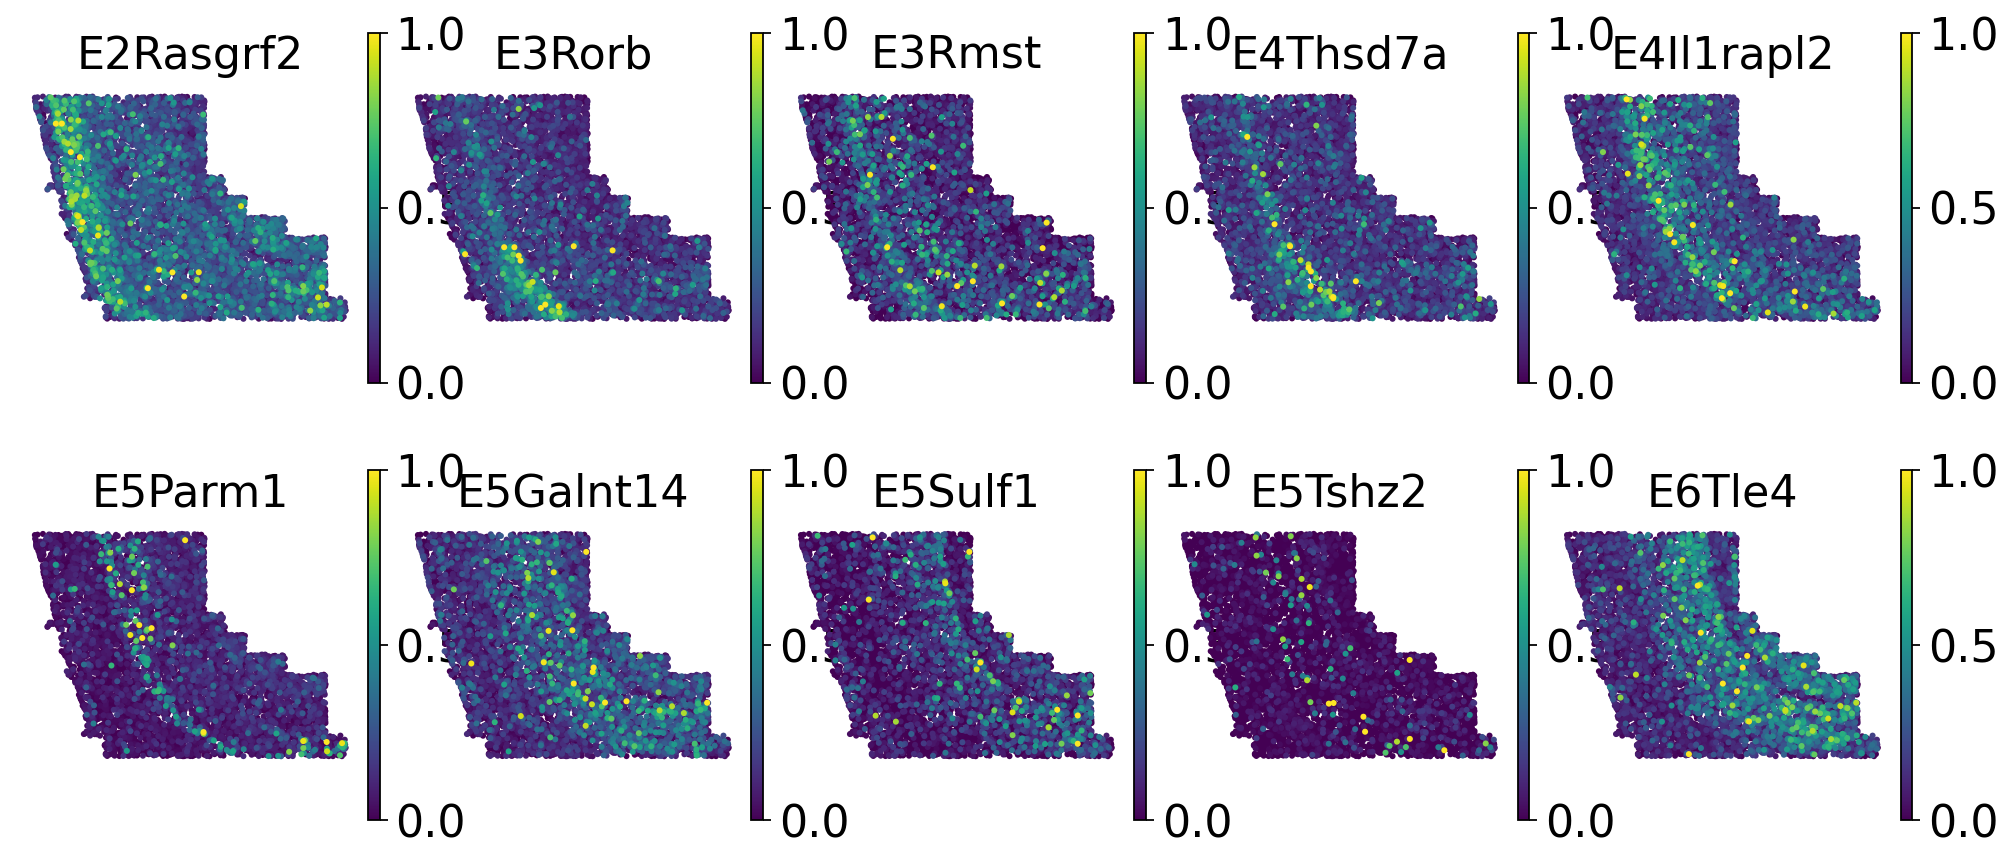

In [35]:
tg.project_cell_annotations(ad_map, ad_sp1, annotation='subclass_label') 
##这里由于是FISH数据，每个spot都会对应一个细胞，如果是Visium，则需要对应多个细胞

annotation_list = ['E2Rasgrf2', 'E3Rorb','E3Rmst','E4Thsd7a','E4Il1rapl2','E5Parm1', 'E5Galnt14','E5Sulf1','E5Tshz2','E6Tle4']
sc.settings.set_figure_params(frameon=True, fontsize=20, facecolor='white',figsize=(3, 3)) #dpi=300, 
# import tangram as tg
plot_cell_annotation_sc(ad_sp1, annotation_list, x='x', y='y', spot_size= 60, scale_factor=0.1, perc=0.001)

In [36]:
ad_sp1.obs['uniform_density']

112       0.00016
129       0.00016
139       0.00016
156       0.00016
209       0.00016
           ...   
280117    0.00016
280119    0.00016
280138    0.00016
280160    0.00016
280311    0.00016
Name: uniform_density, Length: 6264, dtype: float64

In [37]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=adata_sc)
ad_ge

NameError: name 'adata_sc' is not defined

In [ ]:
ad_map

In [ ]:
ad_sc.X.max()